In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

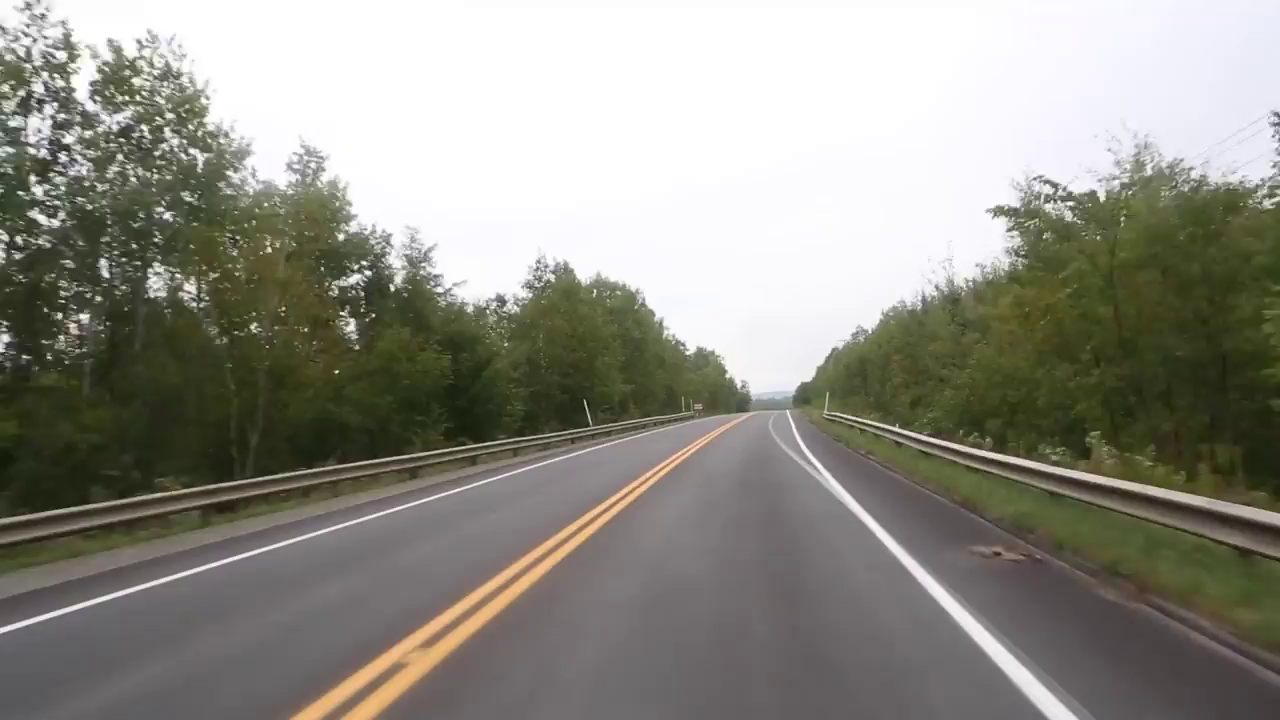

In [2]:
capture = cv2.VideoCapture('/content/test1.mp4')
ret, frame = capture.read()
cv2_imshow(frame)

## Canny Edge Detection

In [3]:
def canny(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kernel = 5
  blur = cv2.GaussianBlur(gray, (kernel, kernel), 0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

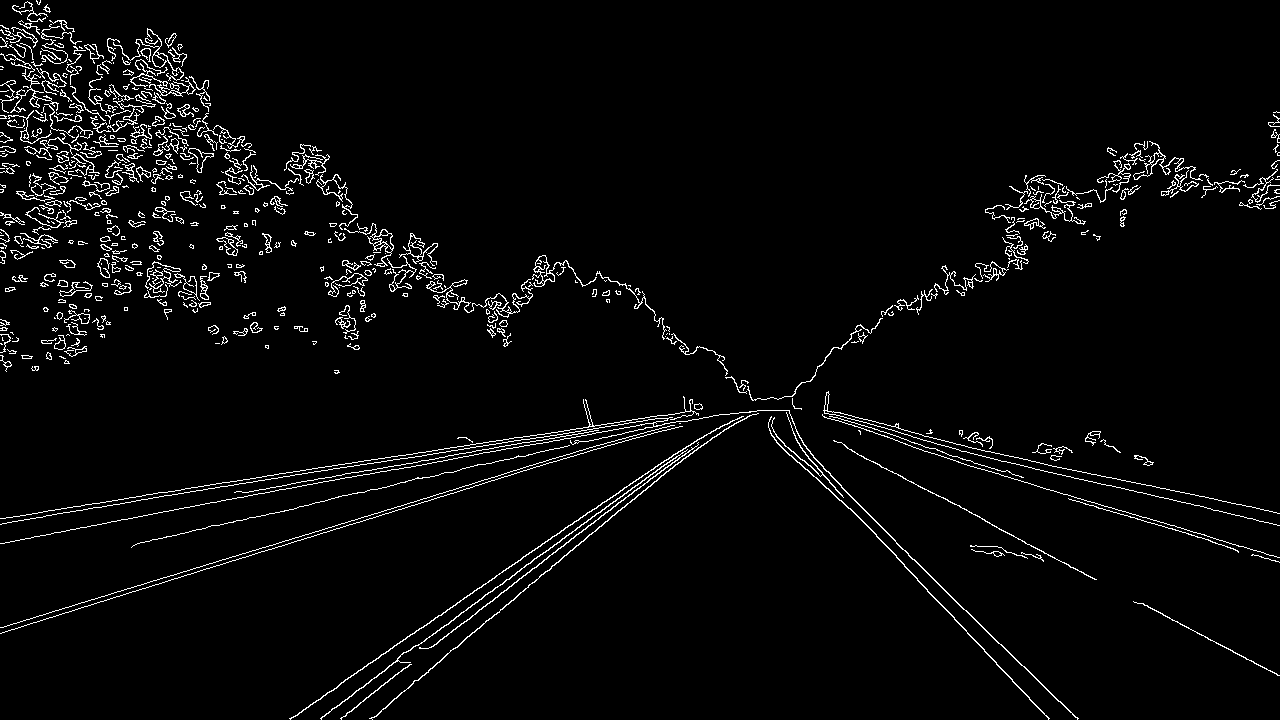

In [4]:
# Calling the canny function and checking if Canny Edge Detection is working fine or not.
canny_output = canny(frame)
cv2_imshow(canny_output)

In [5]:
def region_of_interest(img):
  height = img.shape[0]
  width = img.shape[1]
  mask = np.zeros_like(img)
  triangle = np.array([[(200, height), (800, 350), (1200, height),]], np.int32)
  cv2.fillPoly(mask, triangle, 255)
  masked_image = cv2.bitwise_and(img, mask)
  return masked_image

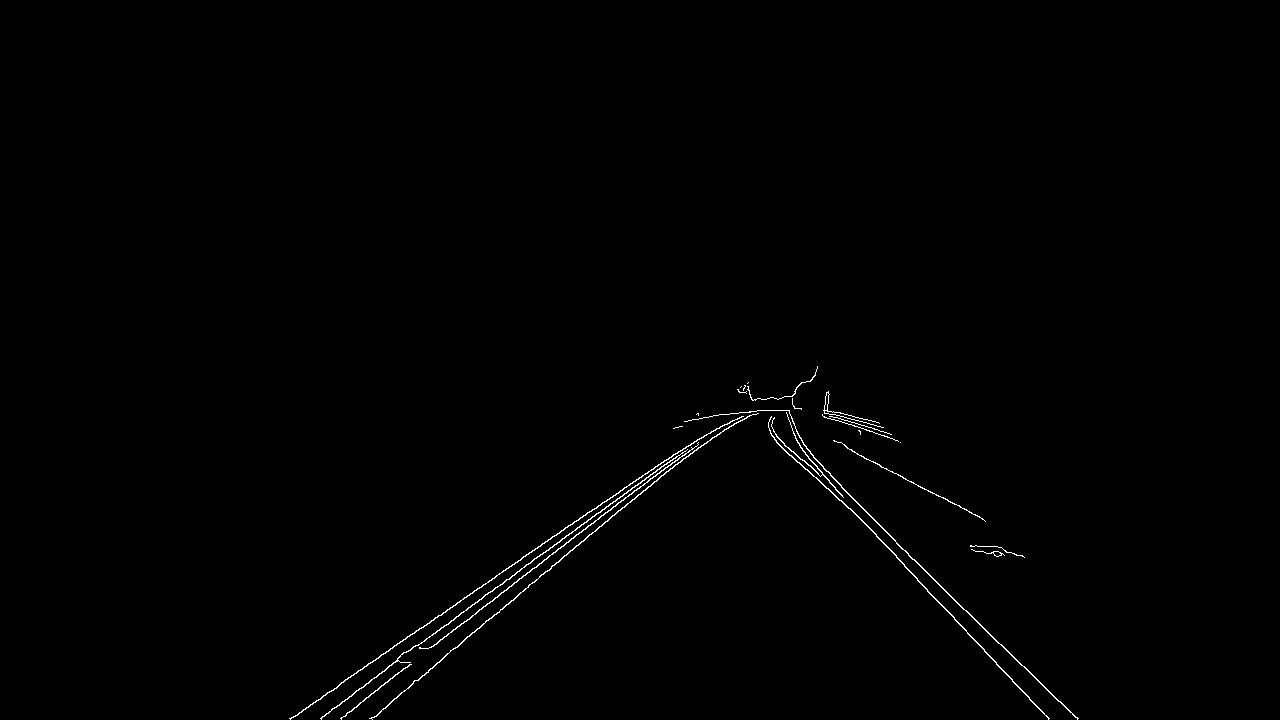

In [6]:
# Checking the output for only interested region and clearing noise.
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
cv2_imshow(masked_output)

In [7]:
def houghLines(img):
  houghLines = cv2.HoughLinesP(img, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap= 5)
  return houghLines

In [8]:
def display_lines(img, lines):
  line_image = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line.reshape(4)
      # cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 10)
      cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 10)
    return line_image

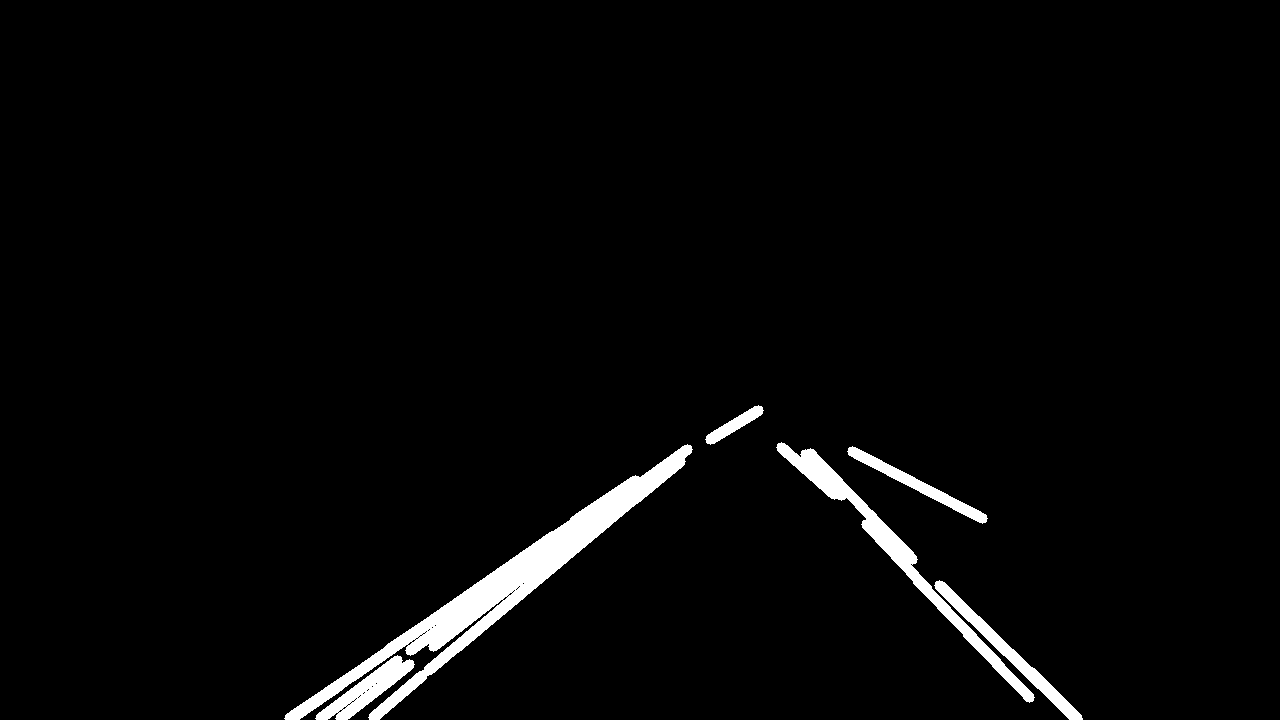

In [9]:
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
lines = houghLines(masked_output)
line_image = display_lines(frame, lines)
cv2_imshow(line_image)

In [10]:
def display_lines_on_frame(img, lines):
  line_image = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line.reshape(4)
      cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 10)
      # cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return img

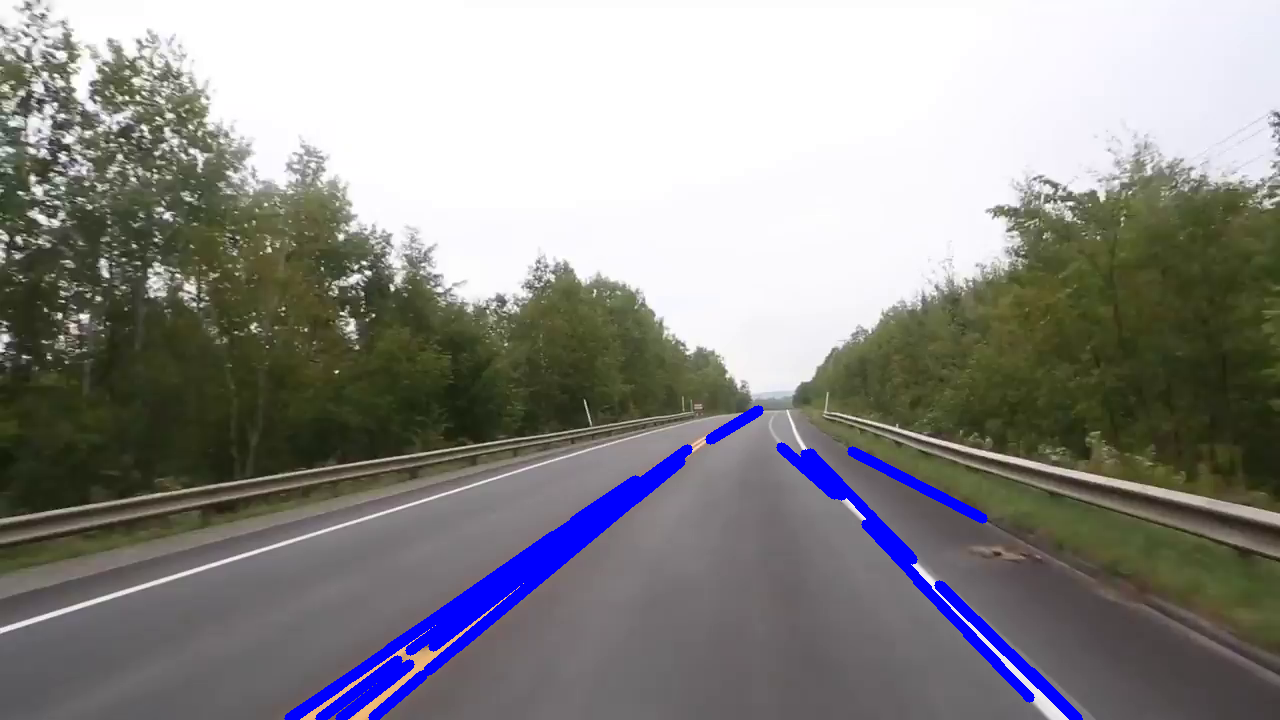

In [11]:
line_image = display_lines_on_frame(frame, lines)
cv2_imshow(line_image)

In [12]:
def display_lines_average(img, lines):
  line_image = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      for x1, y1, x2, y2 in line:
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 10)
        # cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return img

In [13]:
def make_points(img, lineSI):
  slope, intercept = lineSI
  height = img.shape[0]
  y1 = int(height)
  y2 = int(y1*3.0/5)
  x1 = int((y1-intercept)/slope)
  x2 = int((y2-intercept)/slope)
  return [[x1,y1,x2,y2]]

In [14]:
def average_slope_intercept(img, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    for x1, y1, x2, y2 in line:
      fit = np.polyfit((x1, x2), (y1, y2), 1)
      slope = fit[0]
      intercept = fit[1]
      if slope < 0:
        left_fit.append((slope, intercept))
      else:
        right_fit.append((slope, intercept))
  left_fit_average = np.average(left_fit, axis=0)
  right_fit_average = np.average(right_fit, axis=0)
  left_line = make_points(img, left_fit_average)
  right_line = make_points(img, right_fit_average)
  average_lines = [left_line, right_line]
  return average_lines

In [15]:
# Refreshing the frame because previously the program was just updating the final lines on the last updated frame(image).
ret, frame = capture.read()

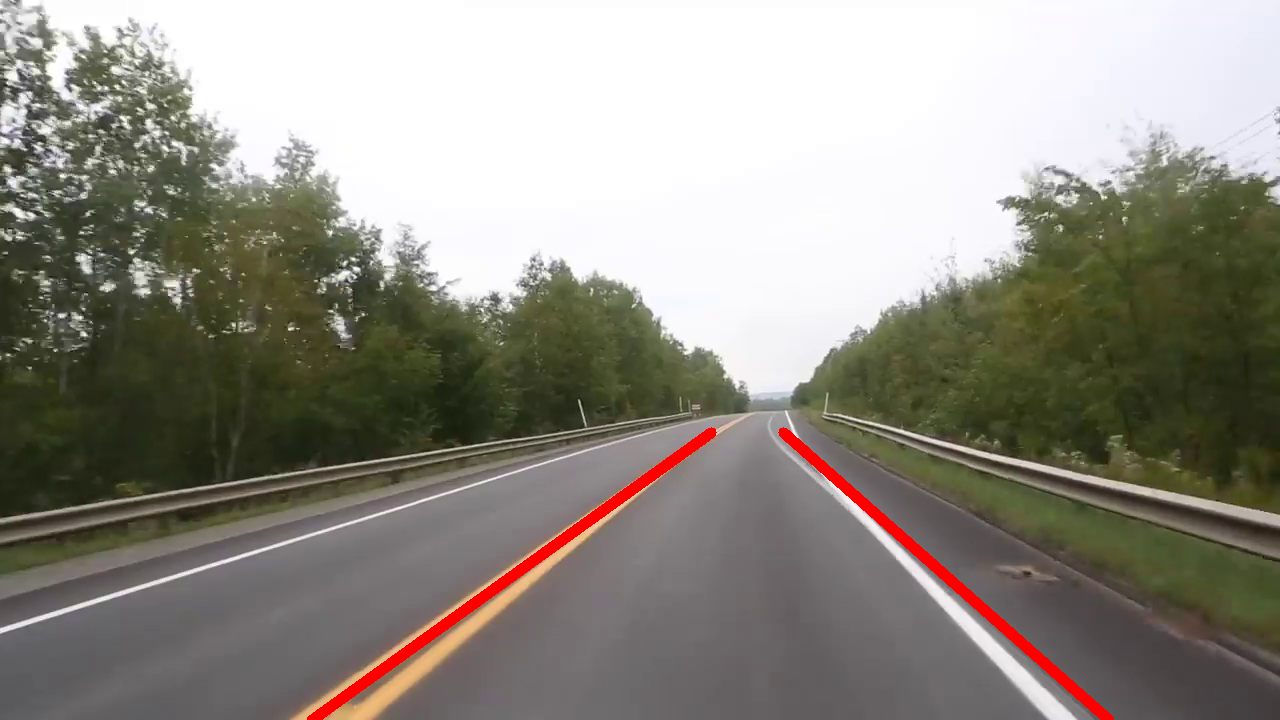

In [16]:
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
lines = houghLines(masked_output)
average_lines = average_slope_intercept(frame, lines)
line_image = display_lines_average(frame, average_lines)
cv2_imshow(line_image)